In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('D:/Portfolio_Github/Enfermedades_Cardiacas/data/raw/enfermedades_cardiacas.csv')
data.info()
#vemos que no hay valores faltantes

<class 'pandas.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           70000 non-null  int64  
 1   edad                         70000 non-null  int64  
 2   genero                       70000 non-null  int64  
 3   altura                       70000 non-null  int64  
 4   peso                         70000 non-null  float64
 5   presion_arterial_sistolica   70000 non-null  int64  
 6   presion_arterial_diastolica  70000 non-null  int64  
 7   nivel_colesterol             70000 non-null  int64  
 8   nivel_glucosa                70000 non-null  int64  
 9   fumador                      70000 non-null  int64  
 10  consume_alcohol              70000 non-null  int64  
 11  actividad_fisica             70000 non-null  int64  
 12  presencia_enfermedad         70000 non-null  int64  
dtypes: float64(1), int64(12)
me

In [2]:
data.head(10)
#en la variable genero 1 es mujer y 2 es hombre

,id,edad,genero,altura,peso,presion_arterial_sistolica,presion_arterial_diastolica,nivel_colesterol,nivel_glucosa,fumador,consume_alcohol,actividad_fisica,presencia_enfermedad
0,1,20805,2,159,75.281733,91,73,3,1,0,0,0,0
1,2,18615,2,175,106.377908,146,74,2,1,0,0,0,1
2,3,21535,2,174,76.922072,129,91,2,3,0,0,1,0
3,4,24820,2,161,62.180865,127,65,2,3,0,0,0,0
4,5,18250,2,183,52.640738,128,73,1,1,0,0,0,0
5,6,18250,2,166,66.461507,115,105,1,1,0,0,1,0
6,7,24820,1,175,72.945479,152,81,3,1,0,0,0,0
7,8,21900,1,158,52.704245,146,89,3,3,0,0,0,1
8,9,17520,2,159,59.550192,157,71,1,1,0,0,1,0
9,10,21170,1,157,46.053479,101,91,1,2,0,0,1,1


In [3]:
#Reemplazamos los valores de la columna genero
data['genero'] = data['genero'].replace({1: 'mujer', 2: 'hombre'})

#los convertimos en columnas dummy
data_dumies = pd.get_dummies(data, columns=['genero'], drop_first=False)

#eliminamos la columna id
data_dumies = data_dumies.drop(columns=['id'])
data_dumies.head()

,edad,altura,peso,presion_arterial_sistolica,presion_arterial_diastolica,nivel_colesterol,nivel_glucosa,fumador,consume_alcohol,actividad_fisica,presencia_enfermedad,genero_hombre,genero_mujer
0,20805,159,75.281733,91,73,3,1,0,0,0,0,True,False
1,18615,175,106.377908,146,74,2,1,0,0,0,1,True,False
2,21535,174,76.922072,129,91,2,3,0,0,1,0,True,False
3,24820,161,62.180865,127,65,2,3,0,0,0,0,True,False
4,18250,183,52.640738,128,73,1,1,0,0,0,0,True,False


In [4]:
#Transformamos las varibles categóricas en booleanas menos nuestro target
data_dumies['fumador'] = data_dumies['fumador'].astype('bool')
data_dumies['consume_alcohol'] = data_dumies['consume_alcohol'].astype('bool')
data_dumies['actividad_fisica'] = data_dumies['actividad_fisica'].astype('bool')

data_dumies.info()

<class 'pandas.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   edad                         70000 non-null  int64  
 1   altura                       70000 non-null  int64  
 2   peso                         70000 non-null  float64
 3   presion_arterial_sistolica   70000 non-null  int64  
 4   presion_arterial_diastolica  70000 non-null  int64  
 5   nivel_colesterol             70000 non-null  int64  
 6   nivel_glucosa                70000 non-null  int64  
 7   fumador                      70000 non-null  bool   
 8   consume_alcohol              70000 non-null  bool   
 9   actividad_fisica             70000 non-null  bool   
 10  presencia_enfermedad         70000 non-null  int64  
 11  genero_hombre                70000 non-null  bool   
 12  genero_mujer                 70000 non-null  bool   
dtypes: bool(5), float64(1), int

In [5]:
#Visualizacione de outliers
def porcentaje_outlier(data, columna):
    rango_intercuartil = data[columna].quantile(.75)- data[columna].quantile(.25)
    limite_superior = data[columna].quantile(.75) + 1.5*rango_intercuartil
    limite_inferior = data[columna].quantile(.25) - 1.5*rango_intercuartil
    #print('Rango superior: ',limite_superior)
    #print('Rango inferior: ',limite_inferior)
    outliers_count = data[(data[columna]>limite_superior)|(data[columna]<limite_inferior)].shape[0]
    print('Porcentaje de outliers en ',columna,': ',np.round(outliers_count*100/data.shape[0],2),'%')
    return limite_superior,limite_inferior, np.round(outliers_count*100/data.shape[0],2)

columnas_numericas = ['edad','altura','peso','presion_arterial_sistolica','presion_arterial_diastolica',
                      'nivel_colesterol','nivel_glucosa']

for columna in columnas_numericas:
  porcentaje_outlier(data_dumies,columna)

Porcentaje de outliers en  edad :  0.95 %
Porcentaje de outliers en  altura :  0.45 %
Porcentaje de outliers en  peso :  0.35 %
Porcentaje de outliers en  presion_arterial_sistolica :  0.33 %
Porcentaje de outliers en  presion_arterial_diastolica :  0.23 %
Porcentaje de outliers en  nivel_colesterol :  0.0 %
Porcentaje de outliers en  nivel_glucosa :  0.0 %


<Axes: xlabel='peso'>

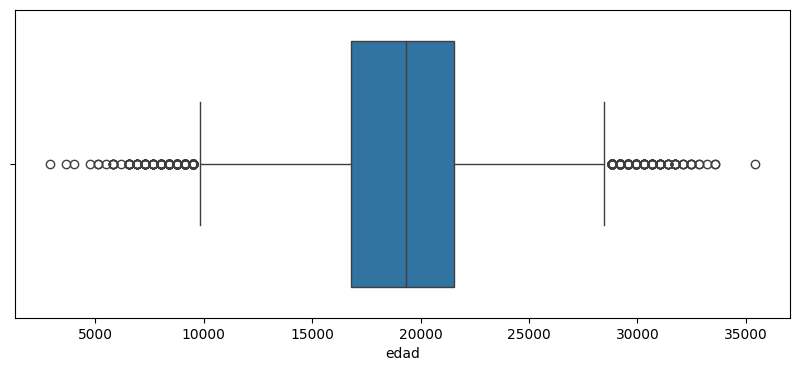

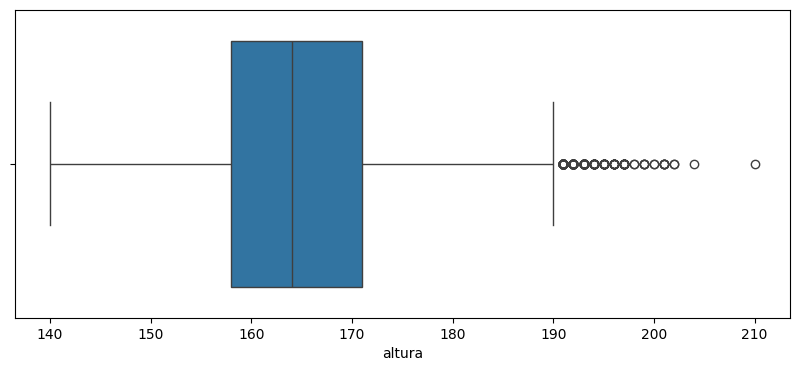

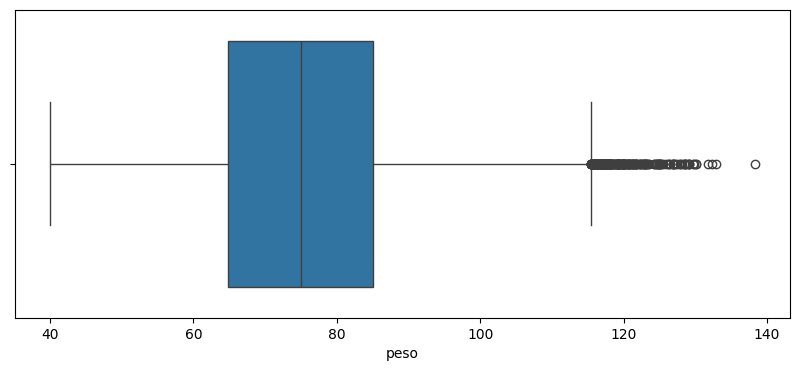

In [6]:
#Visualizacion de outliers
plt.figure(figsize=(10,4))
sns.boxplot(x='edad',data=data_dumies)

plt.figure(figsize=(10,4))
sns.boxplot(x='altura',data=data_dumies)

plt.figure(figsize=(10,4))
sns.boxplot(x='peso',data=data_dumies)

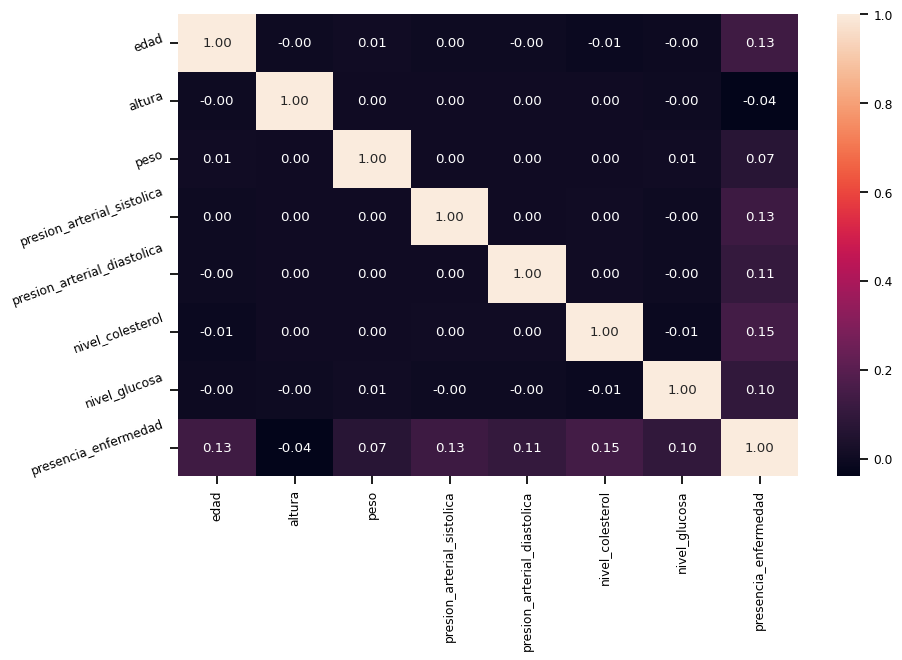

In [7]:
#Vamos a mantener los outliers porque no son datos anormales son informacion valiosa para nuestro modelo.

#Visualizaciones de correlaciones
datos_numericos = data_dumies.select_dtypes(include='number')
correlacion = datos_numericos.corr()

sns.set_context('notebook', font_scale = 0.8 , rc = {'lines-linewidth' : 2.5})
plt.figure(figsize = (10,6))
a = sns.heatmap(correlacion, annot = True, fmt = '.2f')
rotx = a.set_xticklabels(a.get_xticklabels(),rotation = 90)
roty = a.set_yticklabels(a.get_yticklabels(),rotation = 20)

In [8]:
#Guardamos el archivo limpio
data_dumies.to_csv('D:/Portfolio_Github/Enfermedades_Cardiacas/data/processed/enfermedades_cardiacas_limpio.csv', index=False)